<a href="https://colab.research.google.com/github/alves05/Python-Limpeza-e-Tratamento-de-Dados/blob/main/Limpeza_e_tratamento_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limpeza e tratamento de Dados

O processo de limpeza, organização e padronização das informações de um banco de dados garante que estejam válidos, atualizados e prontos para análise. Um banco de dados é composto por informações que são coletadas das mais diferentes fontes, muitas delas desestruturadas.

Para este estudo vamos usar a base de dados Tempo.csv

In [ ]:
# Bibliotecas
import pandas as pd
import seaborn as sns
import statistics as sts

In [ ]:
# Carregando e visualizando os dados
dataset = pd.read_csv('tempo.csv', sep=';')
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


### Exploração dos dados categoricos

- Aparencia

In [ ]:
# Verificando o tamanho
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

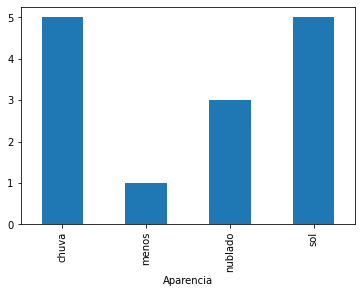

In [ ]:
# Gráfico de barras

agrupado.plot.bar();

In [ ]:
# Verificando tamanho da coluna Vento
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

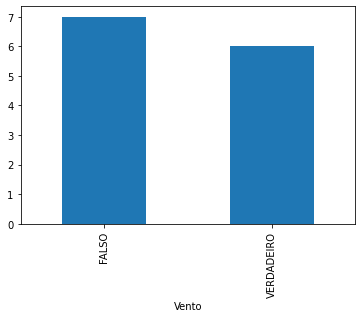

In [ ]:
# Gráfico da coluna Vento
agrupado.plot.bar();

- Jogar

In [ ]:
# Verificando tamanho da coluna Jogar
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

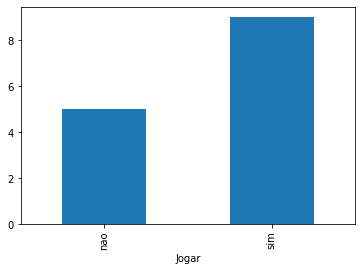

In [ ]:
# Gráfico de barras coluna jogar
agrupado.plot.bar();

### Exploração de dados numéricos

- Temperatura

In [ ]:
# Estatística da coluna Temperatura
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

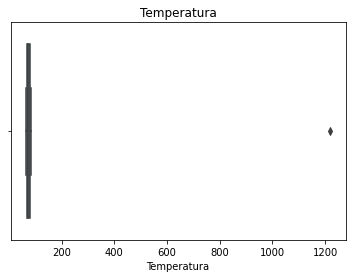

In [ ]:
# Boxplot Temperatura
sns.boxplot(x=dataset['Temperatura']).set_title('Temperatura');

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


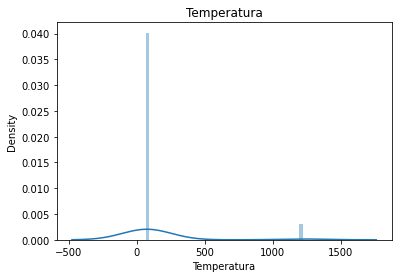

In [ ]:
# Histograma coluna Temperatura
sns.distplot(dataset['Temperatura']).set_title('Temperatura');

- Umidade

In [ ]:
# Estatística da coluna Umidade
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

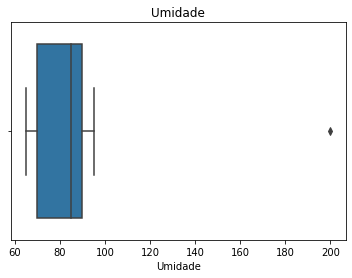

In [ ]:
# Boxplot da coluna Umidade
sns.boxplot(x=dataset['Umidade']).set_title('Umidade');

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


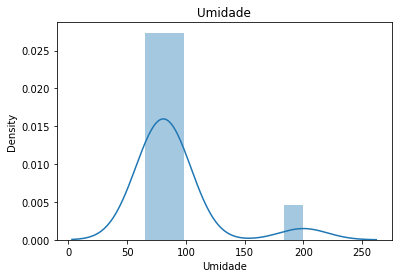

In [ ]:
# Histograma da coluna Umidade
sns.distplot(dataset['Umidade']).set_title('Umidade');

### Verificando e tratando valores nulos

In [ ]:
# Contando valores NAN
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [ ]:
# Visual de valores invalidos
agrupado = dataset.groupby('Aparencia').size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [ ]:
# Substituindo o atributo 'menos' pela moda 'sol'
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = 'sol'

In [ ]:
# Visualizando resultado
agrupado = dataset.groupby('Aparencia').size()
agrupado

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

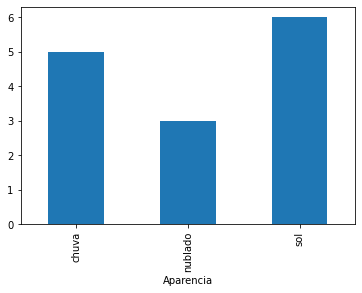

In [ ]:
# Visualizando o gráfico
agrupado.plot.bar();

In [ ]:
# Temperatura fora do dominio de -130 ~ 130F
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [ ]:
# Visualizando
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [ ]:
# Calcular mediana
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [ ]:
# Substituindo outliers
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130), 'Temperatura'] = mediana

In [ ]:
# Verificnado modificação
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [ ]:
# Estatística da coluna Temperatura
dataset['Temperatura'].describe()

count    14.000000
mean     73.678571
std       6.556286
min      64.000000
25%      69.250000
50%      72.750000
75%      78.750000
max      85.000000
Name: Temperatura, dtype: float64

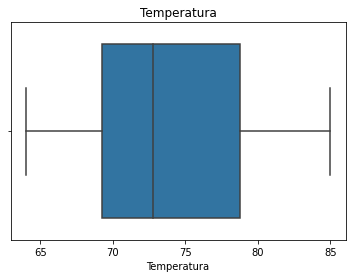

In [ ]:
# Boxplot com dados Temperatura tratados
sns.boxplot(x=dataset['Temperatura']).set_title('Temperatura');

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


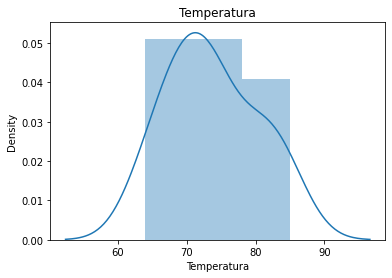

In [ ]:
# Histograma da coluna Temperatura tratados
sns.distplot(dataset['Temperatura']).set_title('Temperatura');

In [ ]:
# Tratamento da coluna Umidade (dominio e NAN)
agrupado = dataset.groupby(['Umidade']).size()
agrupado

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

In [ ]:
# Total das NAs
dataset['Umidade'].isnull().sum()

1

In [ ]:
# Calculo da mediana
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [ ]:
# Preencher os valores nulos com a mediana
dataset['Umidade'].fillna(mediana, inplace=True)

In [ ]:
# Verificando
dataset['Umidade'].isnull().sum()

0

In [ ]:
# Verificando valores fora do dominio 0 ~ 100
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [ ]:
# Alterando o outliers 200.0 pela mediana
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100), 'Umidade'] = mediana

In [ ]:
# Verificando alteração
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [ ]:
# Ventos
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [ ]:
# Total NAs
dataset['Vento'].isnull().sum()

1

In [ ]:
# Preencher NAs com a moda 'FALSO'
dataset['Vento'].fillna('FALSO', inplace=True)

In [ ]:
dataset['Vento'].isnull().sum()

0

In [ ]:
# Verificando
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         8
VERDADEIRO    6
dtype: int64

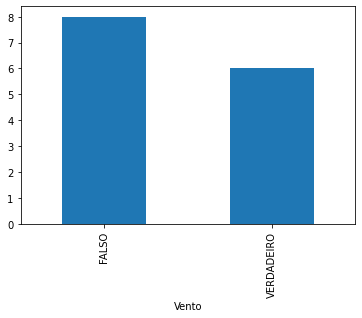

In [ ]:
# Gráfico
agrupado.plot.bar();